# Описание проекта

Для добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd


In [7]:
# Открытие датасетов каждого региона

path = r"C:\Users\Asus\Documents\Python Scripts\github praktikum\07 Машинное обучение в бизнесе"

region_1 = pd.read_csv(path + '/ML_buissnes_region_1.csv')

region_2 = pd.read_csv(path + '/ML_buissnes_region_2.csv')

region_3 = pd.read_csv(path + '/ML_buissnes_region_3.csv')

for data in region_1,region_2,region_3:
    head = data.head()
    print('\n', head, '\n')
                     


       id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647 


       id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305 


       id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746 



In [8]:
#Рассмотрение информаци каждого датасета
for data in region_1,region_2,region_3:
    info = data.info()
    print('\n', info, '\n' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)

In [9]:
# Поиск пустих значений
for data in region_1,region_2,region_3:
    nan_count = data.isna().sum()
    print( nan_count,'\n')

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64 



In [10]:
#Поиск дупликатов 
for data in region_1,region_2,region_3:
    duplicates = data.duplicated().sum()
    print( duplicates, '\n')

0 

0 

0 



### Вывод

Датасеты не имеют значений NAN и дубликатов, датасеты готовы к обработку.

# 2. Обучение и проверка модели

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
#Назначение признаков каждого региона

features_1 = region_1.drop(['id','product'] , axis = 1)
target_1 = region_1['product']

features_2 = region_2.drop(['id','product'] , axis = 1)
target_2 = region_2['product']

features_3 = region_3.drop(['id', 'product'], axis = 1 )
target_3 = region_3['product']

In [13]:
# Деление признауов на обучающий и валидационной данных региона 1
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
        features_1,
        target_1,
        test_size = 0.25
    )

target_train_1.shape

(75000,)

In [14]:
# Деление признауов на обучающий и валидационной данных региона 2
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
        features_2,
        target_2,
        test_size = 0.25
    )

features_train_2.shape

(75000, 3)

In [15]:
# Деление признауов на обучающий и валидационной данных региона 3
features_train_3, features_valid_3, target_train_3, target_valid_3 = train_test_split(
        features_3,
        target_3,
        test_size = 0.25
    )

features_valid_3.shape

(25000, 3)

In [16]:
from sklearn.metrics import mean_squared_error 

# Применеине линейнную регрессию региона 1
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)

#Предсказание на вылидационых данных региона 1 
predict_1 = model_1.predict(features_valid_1)

# Вычисление корень от среднеквадратичной ошибки  региона 1 
rmse_1 = mean_squared_error(target_valid_1, predict_1)**0.5

print( 'RMSE region 1 = ' , rmse_1)

RMSE region 1 =  37.654432027746545


In [17]:
from sklearn.metrics import r2_score 
# Вычисление коэффициента детерминации региона 1
r2_region_1 = r2_score(target_valid_1, predict_1)
print("R2 region 1 =", r2_region_1)


R2 region 1 = 0.2764766647465482


In [18]:
from sklearn.metrics import mean_absolute_error

# Вычисление среднего абсолютного отклонения региона 1
mae_1 = mean_absolute_error(target_valid_1, predict_1)

print('MAE region 1 =' , mae_1)

MAE region 1 = 31.02995165566614


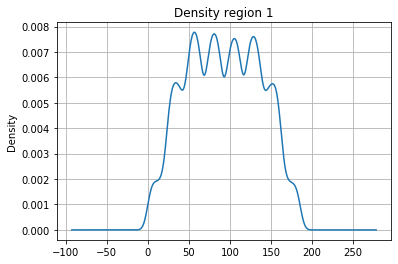

In [20]:
import matplotlib.pyplot as plt

# Распределение плотноси частота сыря региона 1
density_1 = region_1['product'].plot(kind = 'density', label = True, title = 'Density region 1', grid =  True)
plt.show()


In [21]:
# Обучение линейнной регрессии на данных регион 2
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)

#Предсказание на валидационых данных
predict_2 = model_2.predict(features_valid_2)

# Вычисление корень от среднеквадратичной ошибки  региона 2
rmse_2 = mean_squared_error(target_valid_2, predict_2)**0.5

#
print('RMSE region 2 = ' , rmse_2)

RMSE region 2 =  0.8907584030587976


In [22]:
# Вычисление коэффициента детерминации региона 2
r2_region_2 = r2_score(target_valid_2, predict_2)
print("R2 region 2 =", r2_region_2)


R2 region 2 = 0.999625440231366


In [23]:

# Вычисление среднего абсолютного отклонения региона 2
mae_2 = mean_absolute_error(target_valid_2, predict_2)

print('MAE region 1 =' , mae_2)

MAE region 1 = 0.7189170610257435


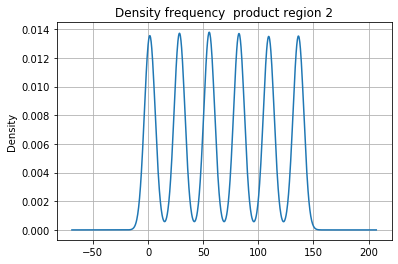

In [24]:
# Распределение плотноси частота сыря региона 1
density_2 = region_2['product'].plot(kind = 'density', grid = True, title = 'Density frequency  product region 2')
plt.show()

In [25]:
# Применеине линейнную регрессию региона 3
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)

#Предсказание на вылидационых данных региона 3
predict_3 = model_3.predict(features_valid_3)

# Вычисление корень от среднеквадратичной ошибки  региона 3
rmse_3 = mean_squared_error(target_valid_3, predict_3)**0.5

print('RMSE region 3 =' , rmse_3)

RMSE region 3 = 40.095233475453135


In [26]:
 #Вычисление коэффициента детерминации региона 3
r2_region_3 = r2_score(target_valid_3, predict_3)
print("R2 region 3 =", r2_region_3)


R2 region 3 = 0.19571515304847542


In [27]:
# Вычисление среднего абсолютного отклонения региона 1
mae_3 = mean_absolute_error(target_valid_3, predict_3)

print('MAE region 3= ', mae_3)

MAE region 3=  32.82832134513329


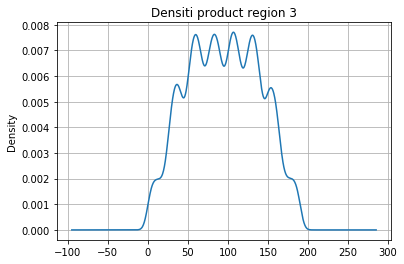

In [28]:
# Распределение плотности частоты сыря региона 3 
density_3 = region_3['product'].plot(kind = 'density', grid = True, title = 'Densiti product region 3')
plt.show()

In [29]:

results = {'RMSE': [rmse_1, rmse_2, rmse_3], 'MAE': [mae_1, mae_2, mae_3], 'R2':[r2_region_1, r2_region_2 ,r2_region_3]}
metrics = pd.DataFrame(data=results,
                     index= ['region_1', 'region_2', 'region_3'])

metrics


,RMSE,MAE,R2
region_1,37.654432,31.029952,0.276477
region_2,0.890758,0.718917,0.999625
region_3,40.095233,32.828321,0.195715


### Вывод

Модель линеийной регресии исправлется с предсказанями лцчше на второй регион, этот вывод исходит из резултата R2 которая близко к единице.  Большое значение корень орень от среднеквадратичной ошибки  региона говорит о большом разбросе ощибок, эти значения намного болще для регилнов 1 и 3. Так же среднего абсолютного отклонения региона 1 и 3 намного болще чес для регилна 2.

Распределение всех предсказания объёма сыря не приближается к нормалному распределению.

# 3. Подготовка к расчёту прибыли

In [30]:
#Переменная общий бюдюет
budget_total = 10*10**9

#Переменная бюджет на разработку одного месторождения
dof = 50*10**6

# Переменная прибыля от одного бареля
profit_bbl = 4500

In [31]:
# Расчет минимального количества объема сыря на месторождения для ее разработки 
min_bbl_in_of = dof/ (profit_bbl)

min_bbl_in_of

11111.111111111111

In [32]:
# Расчёт маинимального обэема сыря в регионе для ее разработки 
min_bbl_in_region = budget_total / (profit_bbl)

min_bbl_in_region

2222222.222222222

In [33]:
# Расчет количество  месторождениях возможных при данном бюджете
qty_dof = budget_total / dof

qty_dof

200.0

In [34]:
# Функция расчета скммарной прибыли  исходя из количетсва возможных месторождений 
def revenue(sample, count):
    sample_sorted = sample.sort_values(ascending=False)[:count]
    return profit_bbl* 1000 * sample_sorted.sum()



# 4. Расчёт прибыли и рисков 

In [35]:
import numpy as np

# Будстрап для предсказания решилна 1, исследуем 500 месторождений а из них берем 200 самых прибылных.
state = np.random.RandomState(12345)
prediction_1 = pd.Series(predict_1)    
values_1 = []
for i in range(1000):
    prediction_subsample = prediction_1.sample(500, replace= True, random_state = state)
    values_1.append(revenue(prediction_subsample, 200))
    
values_1 = pd.Series(values_1)




count    1.000000e+03
mean     1.032997e+11
std      1.155687e+09
min      9.966255e+10
25%      1.025298e+11
50%      1.033606e+11
75%      1.040664e+11
max      1.067359e+11
dtype: float64 count    1.000000e+03
mean     1.239476e+11
std      1.985782e+09
min      1.167648e+11
25%      1.226779e+11
50%      1.240245e+11
75%      1.253202e+11
max      1.294805e+11
dtype: float64


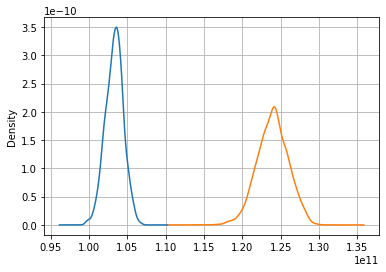

In [36]:
# Будстрап для признака  региона 1, исследуем 500 месторождений а из них берем 200 самых прибылных.
target_1 = []

for i in range(1000):
   
    target_subsample = target_valid_1.sample(500, replace= True, random_state = state)
    target_1.append(revenue(target_subsample, 200))
    
target_1 = pd.Series(target_1)

# Построим распределения плотности для предсказания и реальных данных прибиля. 
ax = values_1.plot(kind = 'density', grid = True, label= 'predict_1')

target_1.plot(kind = 'density', grid = True, ax=ax, label = 'target_1')

# Выведим на экран обзор величин 
print(values_1.describe(),target_1.describe())


In [37]:
from scipy import stats as st

print("Cреднее предсказания региона 1 :", values_1.mean()) 
confidence_interval = st.t.interval( 0.95, len(values_1)- 1,   loc = values_1.mean() , scale = values_1.sem()) # < напишите код здесь >

print("95%-ый доверительный интервал региона 1 :", confidence_interval)

Cреднее предсказания региона 1 : 103299709955.9784
95%-ый доверительный интервал региона 1 : (103227994144.41595, 103371425767.54083)


In [38]:
print("Cреднее валидационого признака региона 1 :", target_1.mean()) 
confidence_interval = st.t.interval( 0.95, len(target_1)- 1,   loc = target_1.mean() , scale = target_1.sem()) # < напишите код здесь >

print("95%-ый доверительный интервал региона 1 :", confidence_interval)


Cреднее валидационого признака региона 1 : 123947621181.90672
95%-ый доверительный интервал региона 1 : (123824394106.93869, 124070848256.87476)


### Вывод

Из графика видно что среднее значение предсказание 103 мил а среднее значение признака 123 мил отличаются . Это резултат был ожидаемый из-за ранее получених результатов метрики качество модели.  Низкое R2= 0.23 и высокое значения МАЕ = 31,5.

In [39]:
# Будстрап для предсказания региона 2, исследуем 500 месторождений а из них берем 200 самых прибылных.
prediction_2 =[]
predict_2 = pd.Series(predict_2)    
for i in range(1000):
    prediction_subsample_2 = predict_2.sample(500, replace= True, random_state = state)
    prediction_2.append(revenue(prediction_subsample_2, 200))
    
prediction_2 = pd.Series(prediction_2)



count    1.000000e+03
mean     1.045093e+11
std      2.040109e+09
min      9.771601e+10
25%      1.031327e+11
50%      1.044896e+11
75%      1.058911e+11
max      1.106495e+11
dtype: float64 count    1.000000e+03
mean     1.045137e+11
std      2.024203e+09
min      9.793488e+10
25%      1.032505e+11
50%      1.044988e+11
75%      1.059327e+11
max      1.100782e+11
dtype: float64


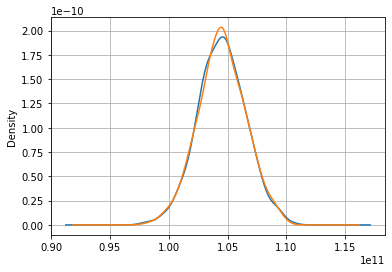

In [40]:
# Будстрап для признака  региона 2, исследуем 500 месторождений а из них берем 200 самых прибылных.
target_2 = []

for i in range(1000):
    target_subsample_2 = target_valid_2.sample(500, replace= True, random_state = state)
    target_2.append(revenue(target_subsample_2, 200))
    
target_2 = pd.Series(target_2)

# Построим распределения плотности для предсказания и реальных данных прибыля. 
ax = prediction_2.plot(kind = 'density', grid = True, label= 'predict_2')

target_2.plot(kind = 'density', grid = True, ax=ax, label = 'target_2')

print(prediction_2.describe() , target_2.describe())

In [41]:
print("Cреднее предсказания региона 2 :", prediction_2.mean()) 
confidence_interval = st.t.interval( 0.95, len(values_1)- 1,   loc = prediction_2.mean() , scale = prediction_2.sem()) # < напишите код здесь >

print("95%-ый доверительный интервал региона 2:", confidence_interval)

Cреднее предсказания региона 2 : 104509286845.2728
95%-ый доверительный интервал региона 2: (104382688523.358, 104635885167.18759)


In [42]:
print("Cреднее признака региона 2:", target_2.mean()) 
confidence_interval = st.t.interval( 0.95, len(values_1)- 1,   loc = target_2.mean() , scale = target_2.sem()) # < напишите код здесь >

print("95%-ый доверительный интервал региона 2:", confidence_interval)

Cреднее признака региона 2: 104513705395.26132
95%-ый доверительный интервал региона 2: (104388094128.5326, 104639316661.99005)


### Вывод

Из графика распределения видно что среднее значение предсказание и  среднее значение признака практический совпадают около значения 104 милярда . Это резултат был ожидаемый из-за ранее получених результатов метрики качество модели.  R2= 0.99 близко к единице  и низкое значения МАЕ = 0,71.

In [43]:
# Будстрап для предсказания региона 3, исследуем 500 месторождений а из них берем 200 самых прибылных.
prediction_3 =[]
predict_3 = pd.Series(predict_3)    
for i in range(1000):
    
    prediction_subsample_3 = predict_3.sample(500, replace= True, random_state = state)
    prediction_3.append(revenue(prediction_subsample_3, 200))
    
prediction_3 = pd.Series(prediction_3)

count    1.000000e+03
mean     1.028764e+11
std      9.862608e+08
min      9.924106e+10
25%      1.022300e+11
50%      1.028944e+11
75%      1.035379e+11
max      1.057131e+11
dtype: float64
count    1.000000e+03
mean     1.261499e+11
std      2.025000e+09
min      1.201773e+11
25%      1.247239e+11
50%      1.260711e+11
75%      1.276320e+11
max      1.333512e+11
dtype: float64


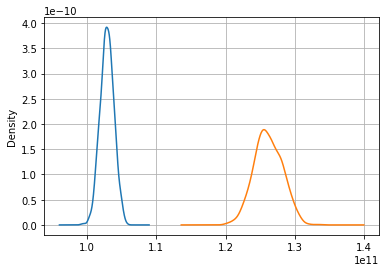

In [44]:
# Будстрап для признака  региона 3, исследуем 500 месторождений а из них берем 200 самых прибылных.
target_3 = []

for i in range(1000):
    #sort_prediction_1 = prediction_1.sort_values(ascending = False)[:200]
    target_subsample_3 = target_valid_3.sample(500, replace= True, random_state = state)
    target_3.append(revenue(target_subsample_3, 200))
    
target_3 = pd.Series(target_3)

# Построим распределения плотности для предсказания и реальных данных прибыля
ax = prediction_3.plot(kind = 'density', grid = True, label= 'predict_2')

target_3.plot(kind = 'density', grid = True, ax=ax, label = 'target_2')

print(prediction_3.describe())
print(target_3.describe())

### Вывод

Из графика распределения видно что среднее значение предсказание и  среднее значение признака сильно отличаются. Это резултат был ожидаемый из-за ранее получених результатов метрики качество модели.  R2= 0.19 близко к нулью  и высокое значения МАЕ = 40.

Если бы у нас не было сведения для сравнения рекомендовали бы разработать регион 2 по скольку среднее значения прибыля 104 милярда рублей. На 1 милярд больше чем средное значение прибыля региона 1 и на 2 милярда чем региона 3. Этот результат тоже обоснуется еще на качество метрики модели.

После сравнения полученых результатов с реальными данными, следует того что больше средное значение прибыля получается из региона 2. То есть ниселоцовразно принимать решения на низкие значения метрики коэфициента детерминаци.